#   **Análisis Exploratorio**


In [ ]:
# Dataset: Loan Default Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('default')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Cargar dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Analisis Predictivo/Examen 1 Predictivo/loan_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Filtramos el datset eliminando personas mayores a 100 años
df = df[df['person_age'] <= 100]

In [ ]:
# Revisamos si hay filas duplicadas
duplicados = df[df.duplicated()]
print("Cantidad de filas duplicadas:", duplicados.shape[0])
print(duplicados)


Cantidad de filas duplicadas: 0
Empty DataFrame
Columns: [person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file, loan_status]
Index: []


In [ ]:
# ==========================================
# PASO 1: CARGA Y EXPLORACIÓN INICIAL
# ==========================================

print("ANÁLISIS EXPLORATORIO - PREDICCIÓN DEFAULT PRÉSTAMOS")
print("="*60)

# Información básica
print(f"Dimensiones: {df.shape[0]:,} préstamos x {df.shape[1]} variables")

# Primeras filas
print("\nPrimeras filas:")
display(df.head())

# Info del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas básicas
print("\nEstadísticas descriptivas:")
display(df.describe())

ANÁLISIS EXPLORATORIO - PREDICCIÓN DEFAULT PRÉSTAMOS
Dimensiones: 44,993 préstamos x 14 variables

Primeras filas:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_gender                   44993 non-null  object 
 2   person_education                44993 non-null  object 
 3   person_income                   44993 non-null  float64
 4   person_emp_exp                  44993 non-null  int64  
 5   person_home_ownership           44993 non-null  object 
 6   loan_amnt                       44993 non-null  float64
 7   loan_intent                     44993 non-null  object 
 8   loan_int_rate                   44993 non-null  float64
 9   loan_percent_income             44993 non-null  float64
 10  cb_person_cred_hist_length      44993 non-null  float64
 11  credit_score                    44993 non-null  int64  
 12  previous_lo

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44993.000000,4.499300e+04,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000
mean,27.748428,7.990845e+04,5.394528,9583.176761,11.006448,0.139736,5.866557,632.585713,0.222257
std,5.909737,6.332213e+04,5.927159,6314.802655,2.978985,0.087207,3.877167,50.402411,0.415767
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719500e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577800e+04,8.000000,12237.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000



ANÁLISIS VARIABLE OBJETIVO: LOAN_STATUS


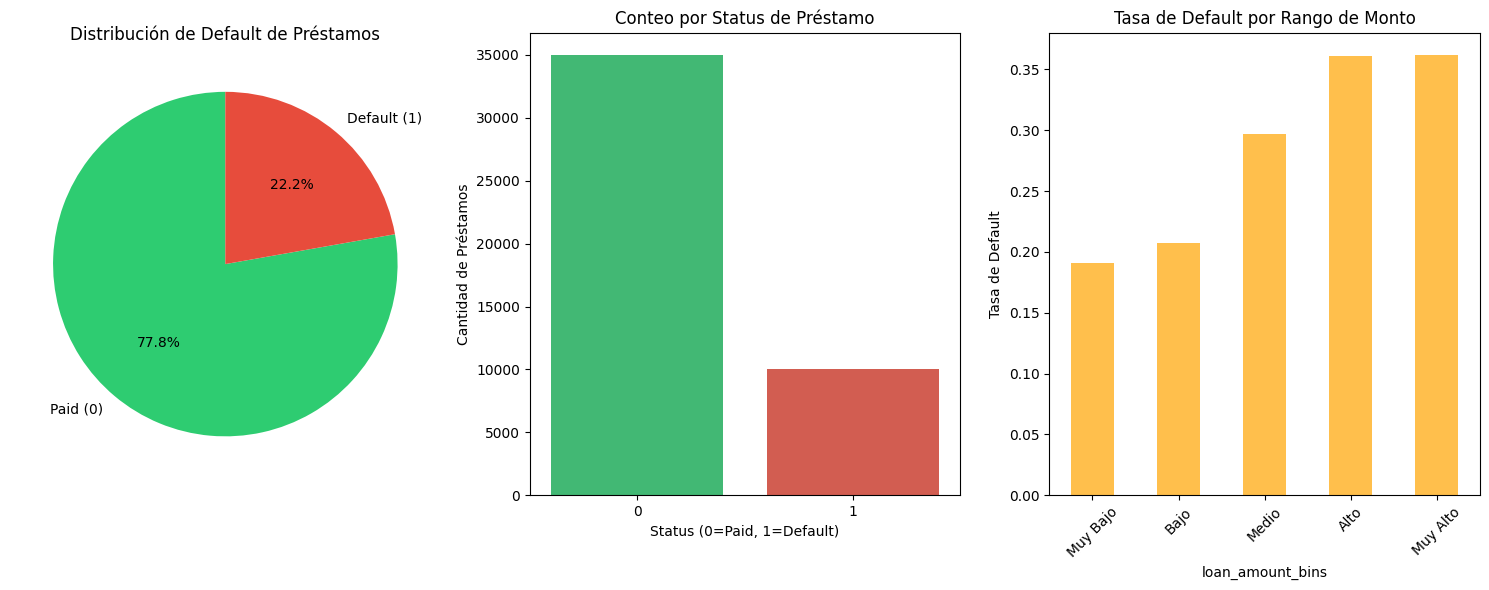

Balance de clases: 0.29 (1.0 = perfectamente balanceado)


In [ ]:
# ==========================================
# PASO 2: ANÁLISIS DE LA VARIABLE OBJETIVO
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS VARIABLE OBJETIVO: LOAN_STATUS")
print("="*60)

# Distribución del loan_status
plt.figure(figsize=(15, 6))

# Distribucion de Default de préstamos
plt.subplot(1, 3, 1)
status_counts = df['loan_status'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Verde para Paid, Rojo para Default
plt.pie(status_counts.values, labels=['Paid (0)', 'Default (1)'],
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Default de Préstamos')

# Conteo por Status de préstamo
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='loan_status', palette=['#2ecc71', '#e74c3c'])
plt.title('Conteo por Status de Préstamo')
plt.xlabel('Status (0=Paid, 1=Default)')
plt.ylabel('Cantidad de Préstamos')

# Tasa de default por rango de monto de préstamo
plt.subplot(1, 3, 3)
df['loan_amount_bins'] = pd.cut(df['loan_amnt'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
default_by_amount = df.groupby('loan_amount_bins')['loan_status'].mean()
default_by_amount.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Tasa de Default por Rango de Monto')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''
paid_count = status_counts[0]
default_count = status_counts[1]
total = paid_count + default_count
default_rate = df['loan_status'].mean()
'''

# Balance de clases
balance_ratio = min(status_counts) / max(status_counts)
print(f"Balance de clases: {balance_ratio:.2f} (1.0 = perfectamente balanceado)")



ANÁLISIS DEMOGRÁFICO


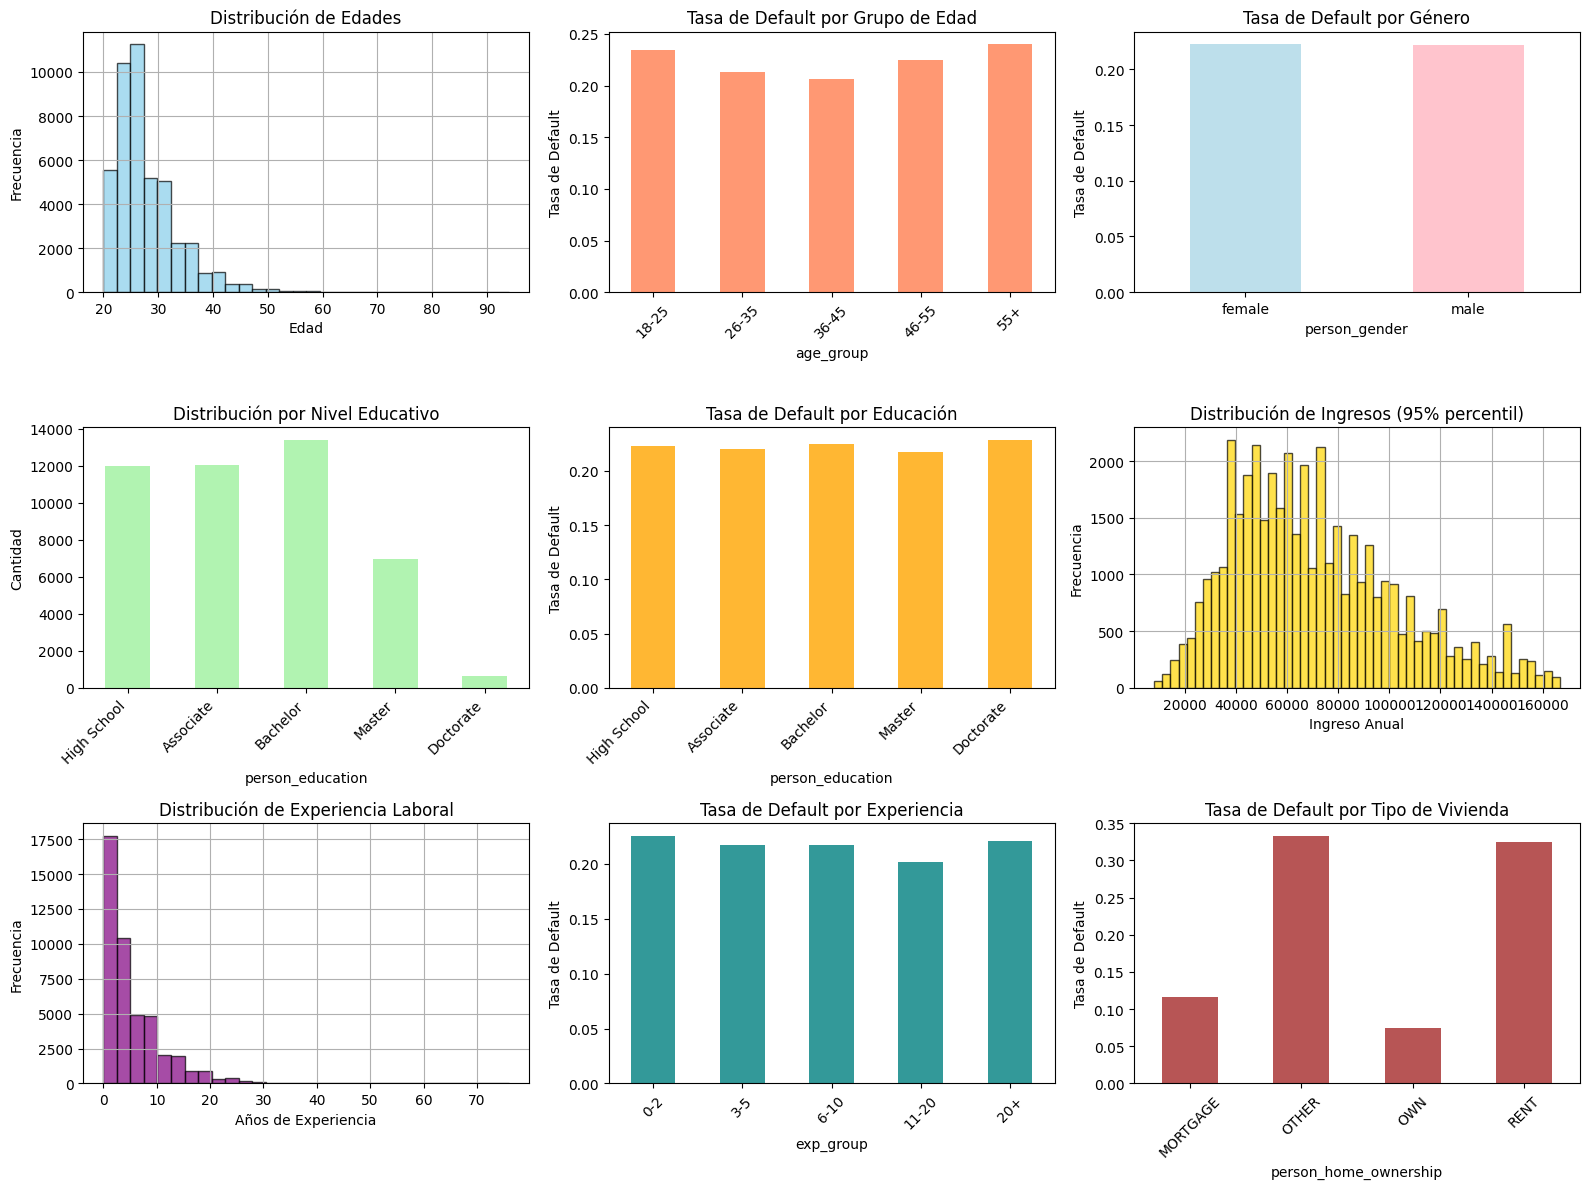

Insights demográficos:
Edad promedio: 27.7 años
Ingreso mediano: $67,046
Experiencia promedio: 5.4 años
Tipo de vivienda más común: RENT

Factores de riesgo demográfico:
   Mayor riesgo por edad: 55+ (24.00%)
   Mayor riesgo por educación: High School (22.31%)
   Mayor riesgo por vivienda: OTHER (33.33%)


In [ ]:
# ==========================================
# PASO 3: ANÁLISIS DEMOGRÁFICO
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS DEMOGRÁFICO")
print("="*60)

plt.figure(figsize=(16, 12))

# Edad
plt.subplot(3, 3, 1)
df['person_age'].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Edad vs Default
plt.subplot(3, 3, 2)
df['age_group'] = pd.cut(df['person_age'], bins=[0, 25, 35, 45, 55, 100],
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])
age_default = df.groupby('age_group')['loan_status'].mean()
age_default.plot(kind='bar', color='coral', alpha=0.8)
plt.title('Tasa de Default por Grupo de Edad')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=45)

# Género vs Default
plt.subplot(3, 3, 3)
gender_default = df.groupby('person_gender')['loan_status'].mean()
gender_default.plot(kind='bar', color=['lightblue', 'lightpink'], alpha=0.8)
plt.title('Tasa de Default por Género')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=0)


# Educación
orden_educacion = ["High School", "Associate", "Bachelor", "Master", "Doctorate"]
plt.subplot(3, 3, 4)
education_counts = df['person_education'].value_counts().reindex(orden_educacion)
education_counts.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Distribución por Nivel Educativo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')


# Educación vs Default
plt.subplot(3, 3, 5)
education_default = df.groupby('person_education')['loan_status'].mean().reindex(orden_educacion)
education_default.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Tasa de Default por Educación')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=45, ha='right')


# Ingresos
plt.subplot(3, 3, 6)
# Filtrar outliers extremos para mejor visualización
income_filtered = df[df['person_income'] <= df['person_income'].quantile(0.95)]
income_filtered['person_income'].hist(bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribución de Ingresos (95% percentil)')
plt.xlabel('Ingreso Anual')
plt.ylabel('Frecuencia')


# Experiencia laboral
plt.subplot(3, 3, 7)
df['person_emp_exp'].hist(bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribución de Experiencia Laboral')
plt.xlabel('Años de Experiencia')
plt.ylabel('Frecuencia')

# Experiencia vs Default
plt.subplot(3, 3, 8)
df['exp_group'] = pd.cut(df['person_emp_exp'], bins=[0, 2, 5, 10, 20, 100],
                        labels=['0-2', '3-5', '6-10', '11-20', '20+'])
exp_default = df.groupby('exp_group')['loan_status'].mean()
exp_default.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Tasa de Default por Experiencia')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=45)

# Propiedad de vivienda vs Default
plt.subplot(3, 3, 9)
home_default = df.groupby('person_home_ownership')['loan_status'].mean()
home_default.plot(kind='bar', color='brown', alpha=0.8)
plt.title('Tasa de Default por Tipo de Vivienda')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Insights demográficos:")
print(f"Edad promedio: {df['person_age'].mean():.1f} años")
print(f"Ingreso mediano: ${df['person_income'].median():,.0f}")
print(f"Experiencia promedio: {df['person_emp_exp'].mean():.1f} años")
print(f"Tipo de vivienda más común: {df['person_home_ownership'].mode()[0]}")

print(f"\nFactores de riesgo demográfico:")
print(f"   Mayor riesgo por edad: {age_default.idxmax()} ({age_default.max():.2%})")
print(f"   Mayor riesgo por educación: {education_default.index[0]} ({education_default.iloc[0]:.2%})")
print(f"   Mayor riesgo por vivienda: {home_default.idxmax()} ({home_default.max():.2%})")



ANÁLISIS DE CARACTERÍSTICAS DEL PRÉSTAMO




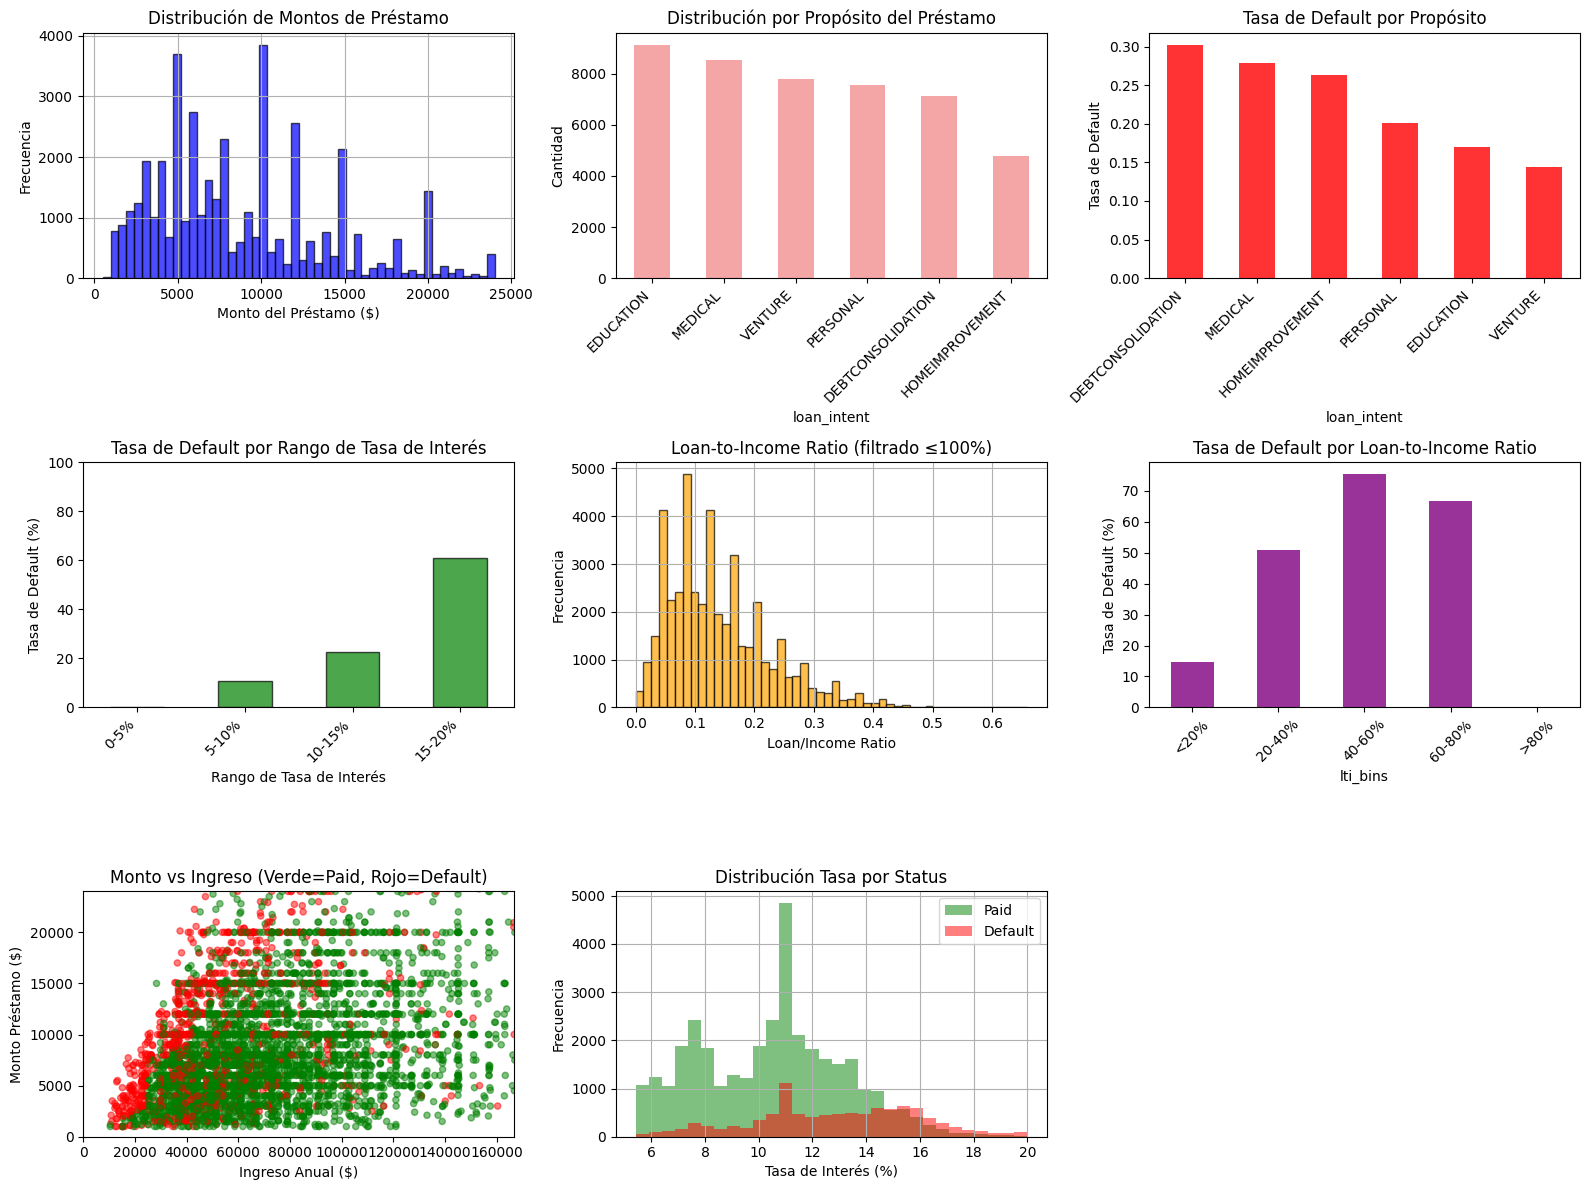

Estadísticas del préstamo:
Monto promedio: $9,583
Tasa de interés promedio: 11.01%
LTI ratio promedio: 13.97%
Propósito más común: EDUCATION

Factores de riesgo del préstamo:
   Mayor riesgo por propósito: DEBTCONSOLIDATION (30.27%)
   Tasa promedio préstamos default: 12.86%
   Tasa promedio préstamos paid: 10.48%


In [ ]:
# ==========================================
# PASO 4: ANÁLISIS DEL PRÉSTAMO
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS DE CARACTERÍSTICAS DEL PRÉSTAMO")
print("="*60)
print("\n")

plt.figure(figsize=(16, 12))

# 1. Monto del préstamo
plt.subplot(3, 3, 1)
loan_filtered = df[df['loan_amnt'] <= df['loan_amnt'].quantile(0.95)]
loan_filtered['loan_amnt'].hist(bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución de Montos de Préstamo')
plt.xlabel('Monto del Préstamo ($)')
plt.ylabel('Frecuencia')

# 2. Propósito del préstamo
plt.subplot(3, 3, 2)
intent_counts = df['loan_intent'].value_counts()
intent_counts.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Distribución por Propósito del Préstamo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

# 3. Propósito vs Default
plt.subplot(3, 3, 3)
intent_default = df.groupby('loan_intent')['loan_status'].mean().sort_values(ascending=False)
intent_default.plot(kind='bar', color='red', alpha=0.8)
plt.title('Tasa de Default por Propósito')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=45, ha='right')

# 4. Tasa de interés (agrupada en bins)
plt.subplot(3, 3, 4)
max_rate = df['loan_int_rate'].max()
step = 5
int_bins = list(range(0, int(max_rate) + step, step))
if int_bins[-1] < max_rate:
    int_bins.append(int(max_rate) + step)
int_labels = [f"{int_bins[i]}-{int_bins[i+1]}%" for i in range(len(int_bins)-1)]
df['int_rate_range'] = pd.cut(df['loan_int_rate'], bins=int_bins, labels=int_labels, include_lowest=True)
default_by_rate = df.groupby('int_rate_range')['loan_status'].mean() * 100
default_by_rate.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('Tasa de Default por Rango de Tasa de Interés')
plt.xlabel('Rango de Tasa de Interés')
plt.ylabel('Tasa de Default (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# 5. Loan-to-Income Ratio (distribución)
plt.subplot(3, 3, 5)
lti_filtered = df[df['loan_percent_income'] <= 1.0]
lti_filtered['loan_percent_income'].hist(bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Loan-to-Income Ratio (filtrado ≤100%)')
plt.xlabel('Loan/Income Ratio')
plt.ylabel('Frecuencia')

# 6. Loan-to-Income vs Default
plt.subplot(3, 3, 6)
df['lti_bins'] = pd.cut(df['loan_percent_income'],
                        bins=[0, 0.2, 0.4, 0.6, 0.8, 5.0],
                        labels=['<20%', '20-40%', '40-60%', '60-80%', '>80%'])
lti_default = df.groupby('lti_bins')['loan_status'].mean() * 100
lti_default.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Tasa de Default por Loan-to-Income Ratio')
plt.ylabel('Tasa de Default (%)')
plt.xticks(rotation=45)

# 7. Monto vs Ingreso (scatter)
plt.subplot(3, 3, 7)
sample_data = df.sample(n=min(5000, len(df)), random_state=42)
colors = ['green' if x == 0 else 'red' for x in sample_data['loan_status']]
plt.scatter(sample_data['person_income'], sample_data['loan_amnt'],
            c=colors, alpha=0.5, s=20)
plt.xlabel('Ingreso Anual ($)')
plt.ylabel('Monto Préstamo ($)')
plt.title('Monto vs Ingreso (Verde=Paid, Rojo=Default)')
plt.xlim(0, df['person_income'].quantile(0.95))
plt.ylim(0, df['loan_amnt'].quantile(0.95))

# 8. Distribución tasa de interés por default
plt.subplot(3, 3, 8)
df[df['loan_status'] == 0]['loan_int_rate'].hist(bins=30, alpha=0.5, label='Paid', color='green')
df[df['loan_status'] == 1]['loan_int_rate'].hist(bins=30, alpha=0.5, label='Default', color='red')
plt.xlabel('Tasa de Interés (%)')
plt.ylabel('Frecuencia')
plt.title('Distribución Tasa por Status')
plt.legend()

plt.tight_layout()
plt.show()


print("Estadísticas del préstamo:")
print(f"Monto promedio: ${df['loan_amnt'].mean():,.0f}")
print(f"Tasa de interés promedio: {df['loan_int_rate'].mean():.2f}%")
print(f"LTI ratio promedio: {df['loan_percent_income'].mean():.2%}")
print(f"Propósito más común: {df['loan_intent'].mode()[0]}")

print(f"\nFactores de riesgo del préstamo:")
print(f"   Mayor riesgo por propósito: {intent_default.index[0]} ({intent_default.iloc[0]:.2%})")
print(f"   Tasa promedio préstamos default: {df[df['loan_status']==1]['loan_int_rate'].mean():.2f}%")
print(f"   Tasa promedio préstamos paid: {df[df['loan_status']==0]['loan_int_rate'].mean():.2f}%")



ANÁLISIS DE FACTORES CREDITICIOS


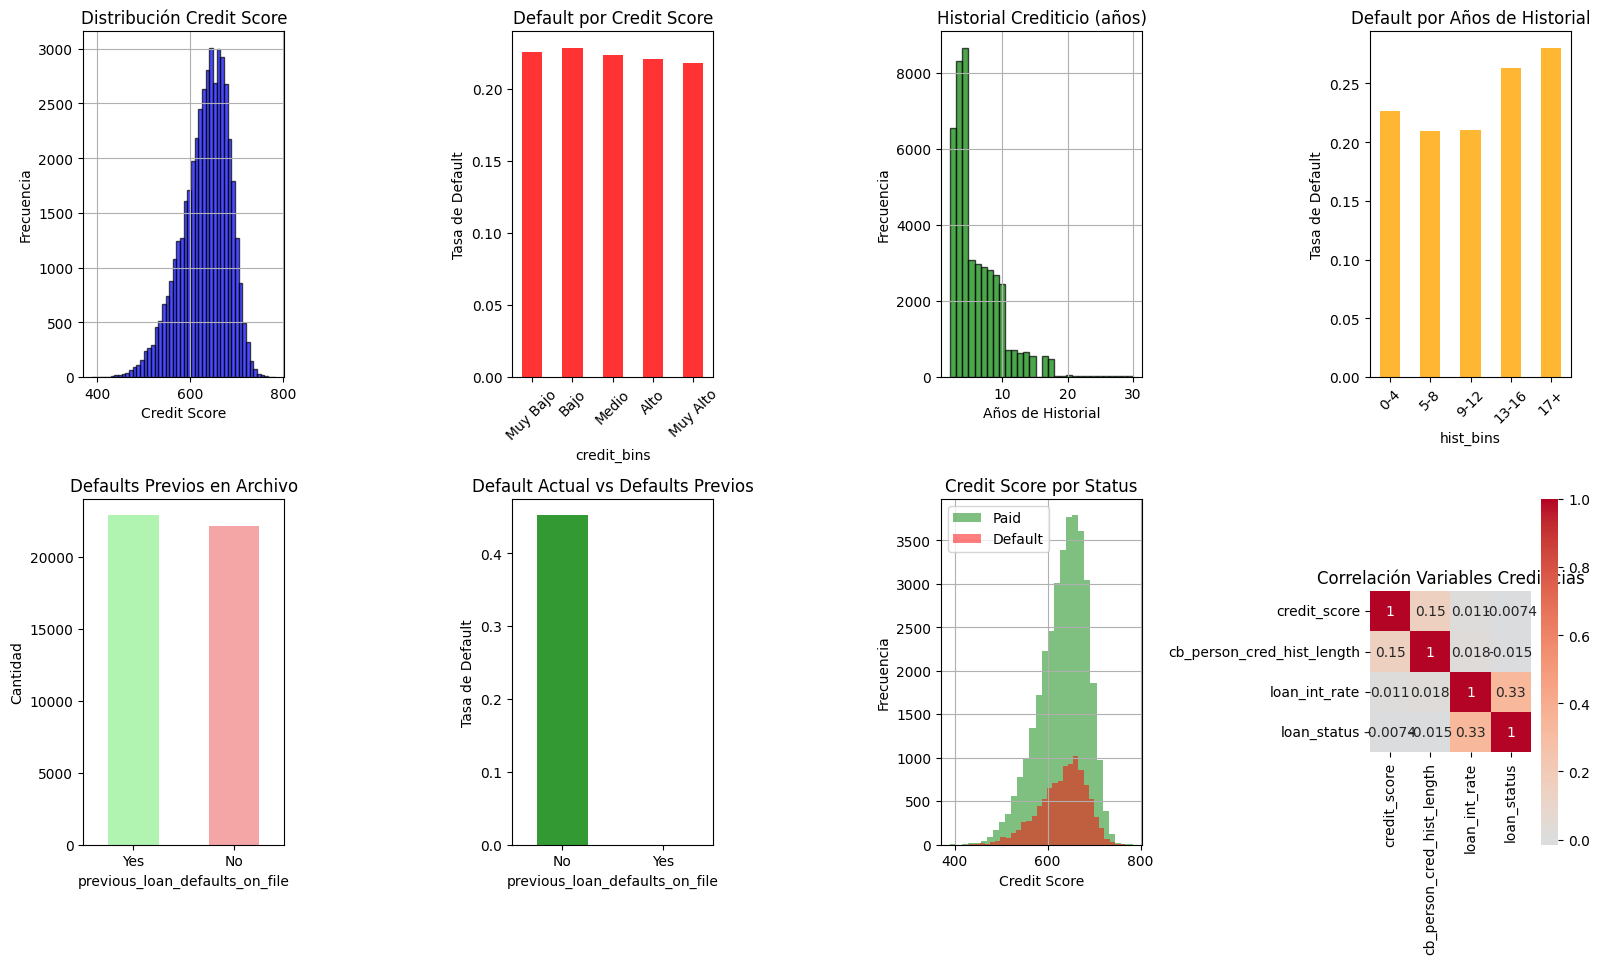

Estadísticas crediticias:
Credit score promedio: 633
Historial crediticio promedio: 5.9 años

Impacto de defaults previos:


loan_status        credit_score loan_int_rate
                                     count   mean         mean          mean
previous_loan_defaults_on_file                                              
No                                   22137  0.452      641.953        11.557
Yes                                  22856  0.000      623.513        10.474


Rangos de credit score:
   Muy Bajo: 22.52% default rate
   Bajo: 22.84% default rate
   Medio: 22.37% default rate
   Alto: 22.10% default rate
   Muy Alto: 21.77% default rate


In [ ]:
# ==========================================
# PASO 5: ANÁLISIS CREDITICIO
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS DE FACTORES CREDITICIOS")
print("="*60)

plt.figure(figsize=(16, 10))

# Credit Score
plt.subplot(2, 4, 1)
df['credit_score'].hist(bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frecuencia')

# Credit Score vs Default
plt.subplot(2, 4, 2)
df['credit_bins'] = pd.cut(df['credit_score'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
credit_default = df.groupby('credit_bins')['loan_status'].mean()
credit_default.plot(kind='bar', color='red', alpha=0.8)
plt.title('Default por Credit Score')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=45)

# Historial crediticio
plt.subplot(2, 4, 3)
df['cb_person_cred_hist_length'].hist(bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Historial Crediticio (años)')
plt.xlabel('Años de Historial')
plt.ylabel('Frecuencia')

# Historial vs Default
plt.subplot(2, 4, 4)
df['hist_bins'] = pd.cut(df['cb_person_cred_hist_length'], bins=5,
                        labels=['0-4', '5-8', '9-12', '13-16', '17+'])
hist_default = df.groupby('hist_bins')['loan_status'].mean()
hist_default.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Default por Años de Historial')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=45)

# Defaults previos
plt.subplot(2, 4, 5)
prev_default_counts = df['previous_loan_defaults_on_file'].value_counts()
prev_default_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'], alpha=0.7)
plt.title('Defaults Previos en Archivo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

# Defaults previos vs Default actual
plt.subplot(2, 4, 6)
prev_vs_current = df.groupby('previous_loan_defaults_on_file')['loan_status'].mean()
prev_vs_current.plot(kind='bar', color=['green', 'red'], alpha=0.8)
plt.title('Default Actual vs Defaults Previos')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=0)

# Credit Score distributions por status
plt.subplot(2, 4, 7)
df[df['loan_status'] == 0]['credit_score'].hist(bins=30, alpha=0.5, label='Paid', color='green')
df[df['loan_status'] == 1]['credit_score'].hist(bins=30, alpha=0.5, label='Default', color='red')
plt.xlabel('Credit Score')
plt.ylabel('Frecuencia')
plt.title('Credit Score por Status')
plt.legend()

# Correlación entre variables crediticias
plt.subplot(2, 4, 8)
credit_vars = ['credit_score', 'cb_person_cred_hist_length', 'loan_int_rate', 'loan_status']
corr_matrix = df[credit_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlación Variables Crediticias')

plt.tight_layout()
plt.show()

print("Estadísticas crediticias:")
print(f"Credit score promedio: {df['credit_score'].mean():.0f}")
print(f"Historial crediticio promedio: {df['cb_person_cred_hist_length'].mean():.1f} años")

# Análisis de defaults previos
prev_default_analysis = df.groupby('previous_loan_defaults_on_file').agg({
    'loan_status': ['count', 'mean'],
    'credit_score': 'mean',
    'loan_int_rate': 'mean'
}).round(3)

print(f"\nImpacto de defaults previos:")
display(prev_default_analysis)

print(f"\nRangos de credit score:")
for credit_range, rate in credit_default.items():
    print(f"   {credit_range}: {rate:.2%} default rate")


ANÁLISIS MULTIVARIADO Y CORRELACIONES


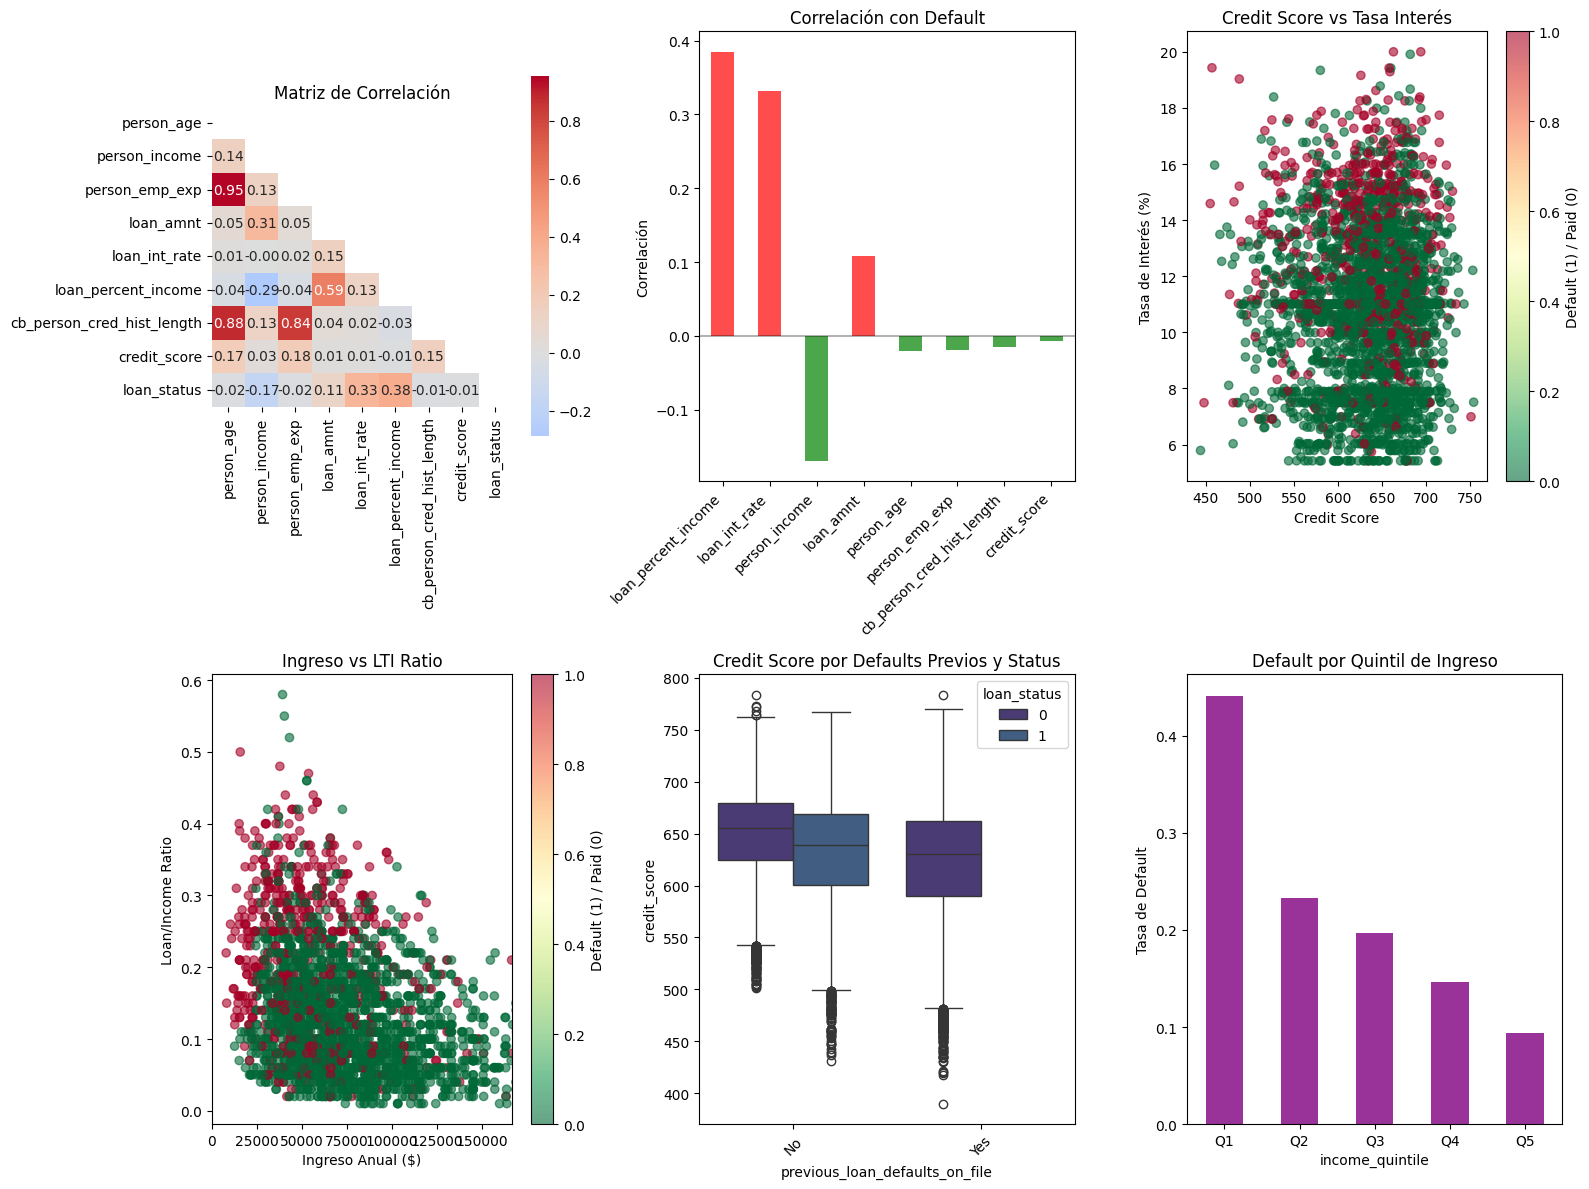

Correlaciones más fuertes con default:
   loan_percent_income: 0.385
   loan_int_rate: 0.332
   person_income: -0.169
   loan_amnt: 0.108
   person_age: -0.021

Correlaciones más fuertes negativas (protectivas):
   person_emp_exp: -0.020
   cb_person_cred_hist_length: -0.015
   credit_score: -0.007


In [ ]:
# ==========================================
# PASO 6: ANÁLISIS MULTIVARIADO
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS MULTIVARIADO Y CORRELACIONES")
print("="*60)

plt.figure(figsize=(16, 12))

# Matriz de correlación general
plt.subplot(2, 3, 1)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación')

# Correlación con target
plt.subplot(2, 3, 2)
target_corr = corr_matrix['loan_status'].drop('loan_status').sort_values(key=abs, ascending=False)
colors = ['red' if x > 0 else 'green' for x in target_corr.values]
target_corr.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Correlación con Default')
plt.ylabel('Correlación')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Scatter plots de variables importantes
plt.subplot(2, 3, 3)
sample_data = df.sample(n=min(3000, len(df)))
scatter = plt.scatter(sample_data['credit_score'], sample_data['loan_int_rate'],
                     c=sample_data['loan_status'], cmap='RdYlGn_r', alpha=0.6)
plt.xlabel('Credit Score')
plt.ylabel('Tasa de Interés (%)')
plt.title('Credit Score vs Tasa Interés')
plt.colorbar(scatter, label='Default (1) / Paid (0)')

plt.subplot(2, 3, 4)
scatter2 = plt.scatter(sample_data['person_income'], sample_data['loan_percent_income'],
                      c=sample_data['loan_status'], cmap='RdYlGn_r', alpha=0.6)
plt.xlabel('Ingreso Anual ($)')
plt.ylabel('Loan/Income Ratio')
plt.title('Ingreso vs LTI Ratio')
plt.colorbar(scatter2, label='Default (1) / Paid (0)')
plt.xlim(0, df['person_income'].quantile(0.95))

# Box plots por segmentos
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='previous_loan_defaults_on_file', y='credit_score', hue='loan_status')
plt.title('Credit Score por Defaults Previos y Status')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
# Análisis por quintiles de ingreso
df['income_quintile'] = pd.qcut(df['person_income'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
quintile_default = df.groupby('income_quintile')['loan_status'].mean()
quintile_default.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Default por Quintil de Ingreso')
plt.ylabel('Tasa de Default')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("Correlaciones más fuertes con default:")
for var, corr in target_corr.head(5).items():
    print(f"   {var}: {corr:.3f}")

print(f"\nCorrelaciones más fuertes negativas (protectivas):")
for var, corr in target_corr.tail(3).items():
    print(f"   {var}: {corr:.3f}")



CALIDAD DE DATOS Y OUTLIERS




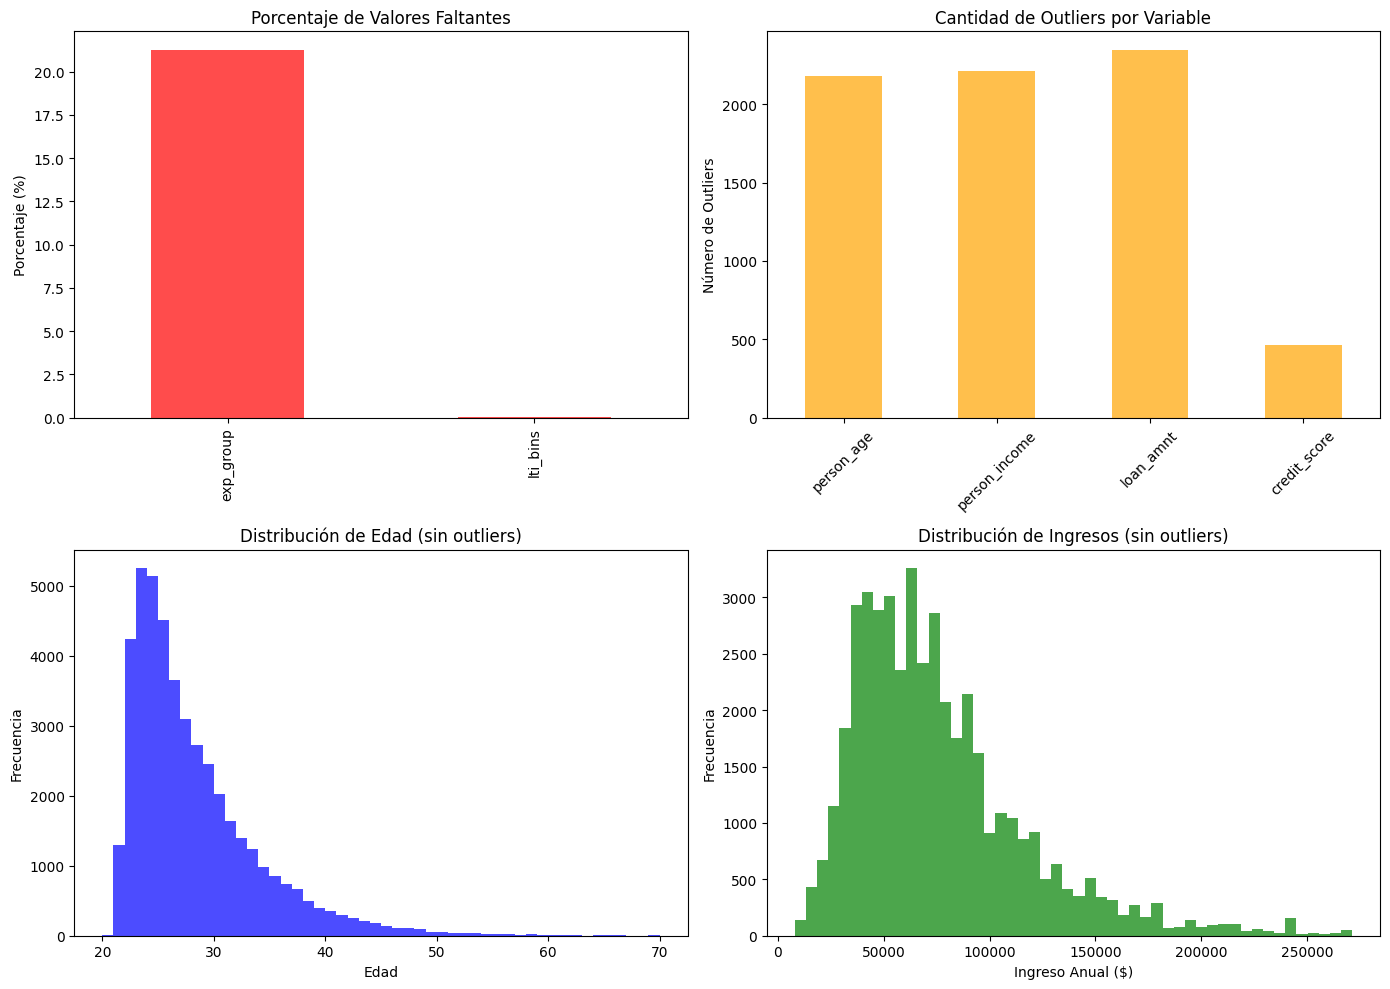

Variables con valores faltantes:
   exp_group: 9,566 (21.26%)
   lti_bins: 24 (0.05%)

Outliers detectados:
   person_age: 2,181 outliers (4.8%)
   person_income: 2,214 outliers (4.9%)
   loan_amnt: 2,348 outliers (5.2%)
   credit_score: 462 outliers (1.0%)

Análisis de consistencia:
   Edad mínima: 20.0 años
   Edad máxima: 94.0 años
   Experiencia > Edad-18: 0 casos
   LTI ratio > 100%: 0 casos
   Historial > Edad: 0 casos


In [ ]:
# ==========================================
# PASO 7: DETECCIÓN DE OUTLIERS Y CALIDAD
# ==========================================

print("\n" + "="*60)
print("CALIDAD DE DATOS Y OUTLIERS")
print("="*60)
print("\n")

# Valores faltantes
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_data / len(df) * 100).round(2)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
if missing_data.sum() > 0:
    missing_pct[missing_pct > 0].plot(kind='bar', color='red', alpha=0.7)
    plt.title('Porcentaje de Valores Faltantes')
    plt.ylabel('Porcentaje (%)')
else:
    plt.text(0.5, 0.5, 'No hay valores faltantes', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=16)
    plt.title('Valores Faltantes')

# Detección de outliers en variables numéricas
plt.subplot(2, 2, 2)
outlier_counts = {}
for col in ['person_age', 'person_income', 'loan_amnt', 'credit_score']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

outlier_series = pd.Series(outlier_counts)
outlier_series.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Cantidad de Outliers por Variable')
plt.ylabel('Número de Outliers')
plt.xticks(rotation=45)

# Distribuciones SIN outliers
# Edad sin outliers (ejemplo: >95 se consideran outliers)
plt.subplot(2, 2, 3)
age_no_outliers = df[df['person_age'] <= 70]
plt.hist(age_no_outliers['person_age'], bins=50, alpha=0.7, color='blue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad (sin outliers)')

# Ingresos sin outliers (quitamos valores mayores al percentil 99)
plt.subplot(2, 2, 4)
income_p99 = df['person_income'].quantile(0.99)
income_no_outliers = df[df['person_income'] <= income_p99]
plt.hist(income_no_outliers['person_income'], bins=50, alpha=0.7, color='green')
plt.xlabel('Ingreso Anual ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos (sin outliers)')

plt.tight_layout()
plt.show()


# Reporte de datos faltantes
if missing_data.sum() == 0:
    print("No hay valores faltantes en el dataset")
else:
    print("Variables con valores faltantes:")
    for col, pct in missing_pct[missing_pct > 0].items():
        count = missing_data[col]
        print(f"   {col}: {count:,} ({pct}%)")

# Reporte de outliers
print(f"\nOutliers detectados:")
for var, count in outlier_counts.items():
    pct = count / len(df) * 100
    print(f"   {var}: {count:,} outliers ({pct:.1f}%)")

# Análisis de consistencia
print(f"\nAnálisis de consistencia:")
print(f"   Edad mínima: {df['person_age'].min()} años")
print(f"   Edad máxima: {df['person_age'].max()} años")
print(f"   Experiencia > Edad-18: {(df['person_emp_exp'] > (df['person_age'] - 18)).sum()} casos")
print(f"   LTI ratio > 100%: {(df['loan_percent_income'] > 1.0).sum()} casos")
print(f"   Historial > Edad: {(df['cb_person_cred_hist_length'] > df['person_age']).sum()} casos")
